# Processing XMLs from https://extract.bbbike.org/

In [1]:
%load_ext autoreload
%autoreload 2

import osmnx as ox # using fork `New geometries module - Work In Progress`
ox.utils.config(use_cache=True, log_console=True)

import geopandas as gpd
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

from carto_type_plot import carto_plot

### Shenzhen https://www.openstreetmap.org/#map=12/22.5417/114.0285

In [28]:
gdf = ox.gdf_from_xml('XML/planet_113.894,22.4875_114.1378,22.6127.osm')

In [29]:
gdf.to_crs(epsg=2326, inplace=True)

(<Figure size 1728x1728 with 1 Axes>, <AxesSubplot:>)

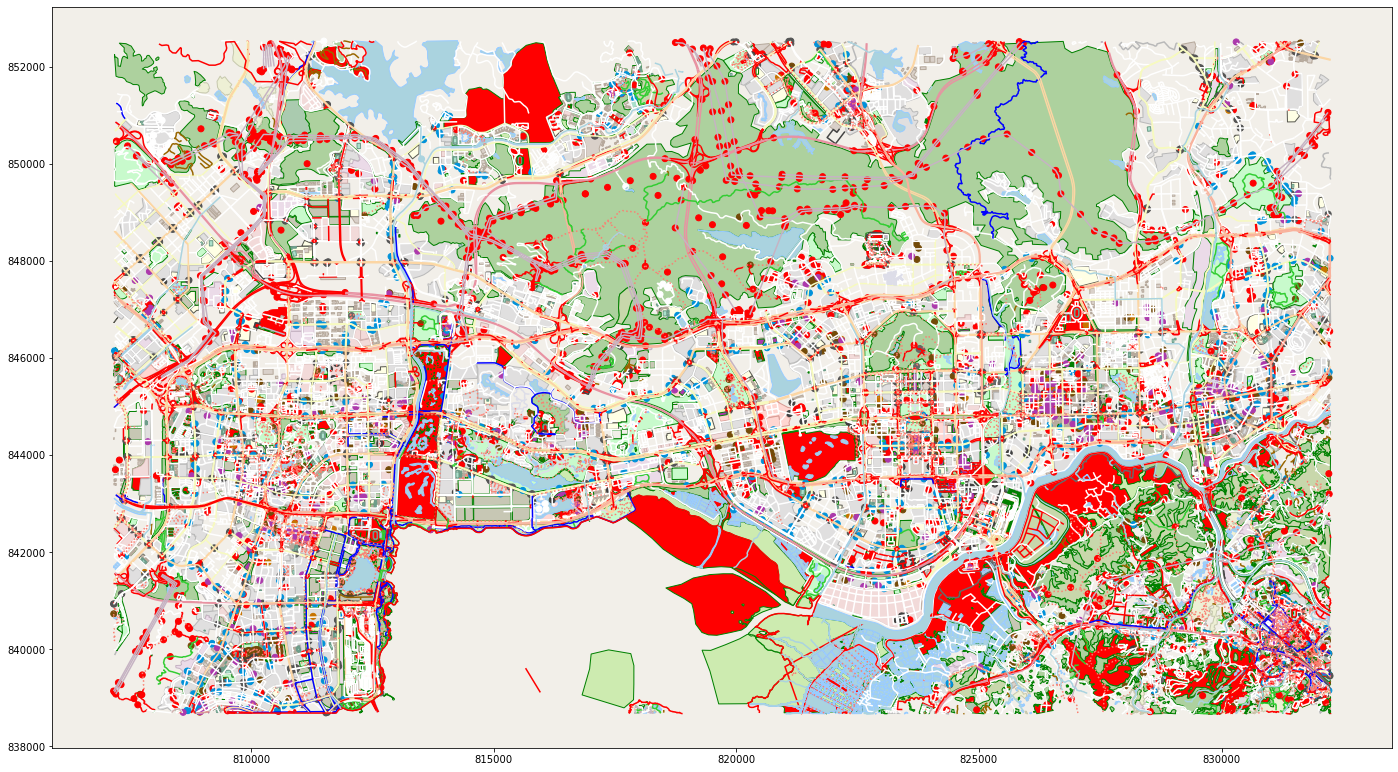

In [31]:
# gdf = ox.project_gdf(gdf) # this is very slow - perhaps because it performs .unary_union?
carto_plot(gdf)

### Hawera https://www.openstreetmap.org/#map=12/-39.5999/174.5000

In [8]:
gdf = ox.gdf_from_xml('XML/planet_174.288_-39.645_267549cf.osm')

In [10]:
gdf.to_crs(epsg=2193, inplace=True)

/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarn

(<Figure size 1728x1728 with 1 Axes>, <AxesSubplot:>)

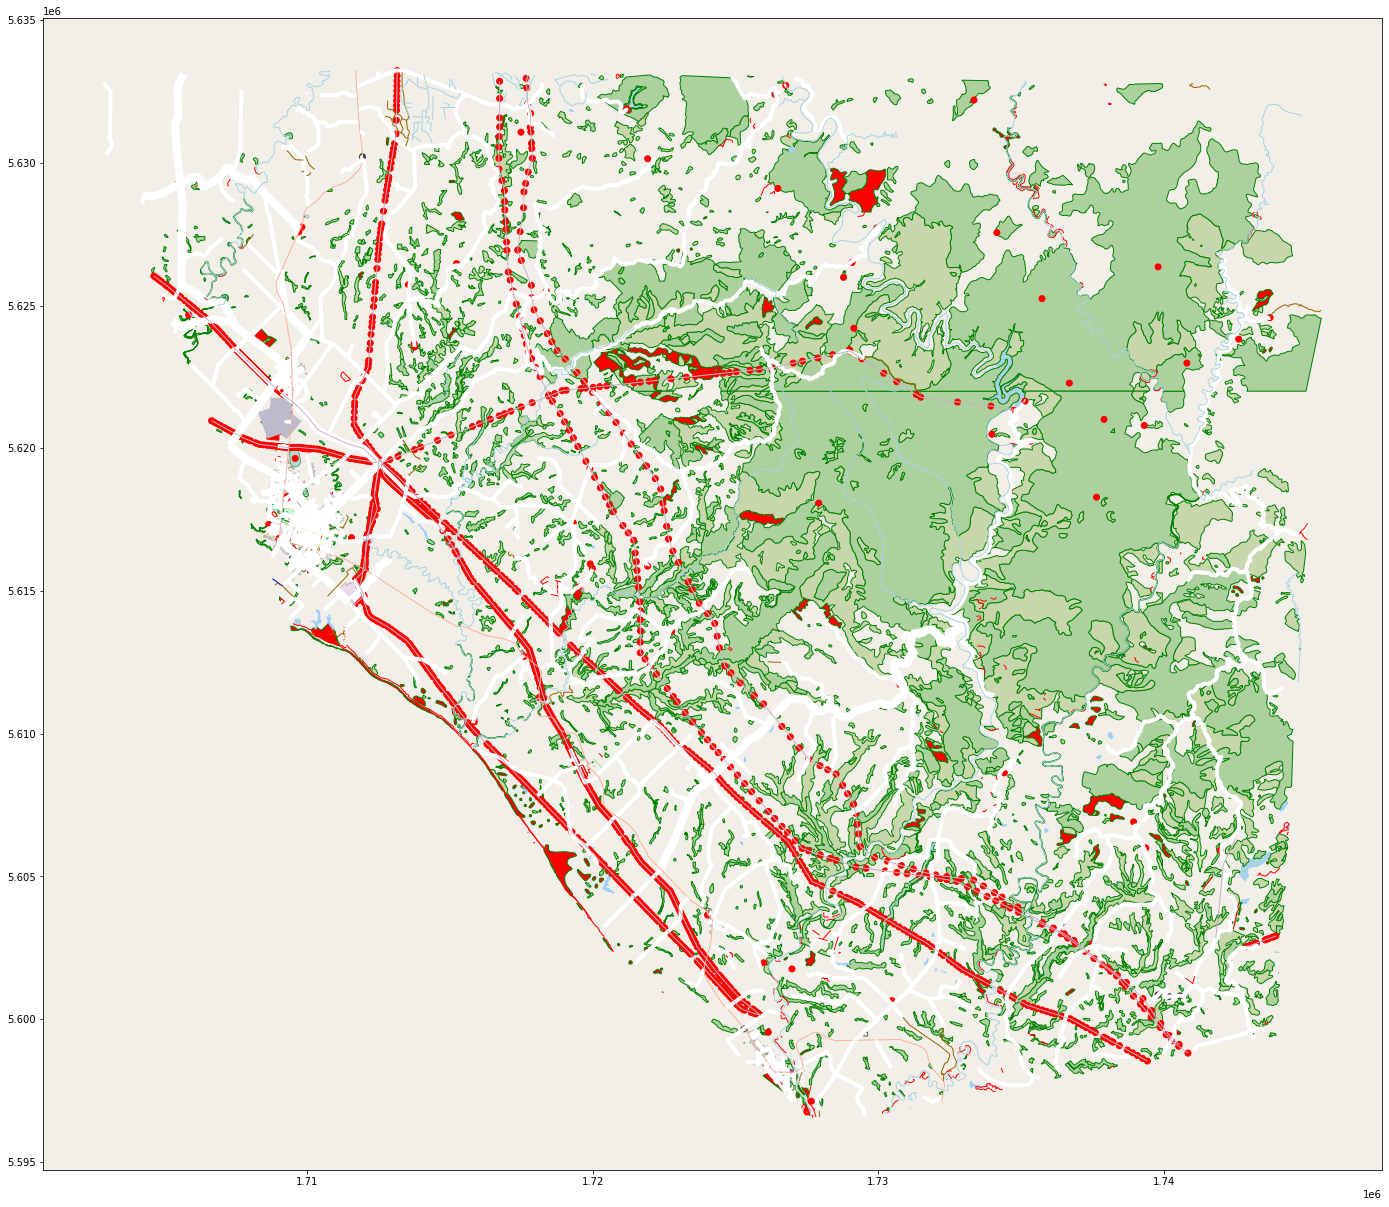

In [11]:
carto_plot(gdf)

### Berlin

In [17]:
Berlin = ox.gdf_from_xml('XML/planet_13.3627,52.4952_13.4483,52.5279.osm')

In [19]:
Berlin.to_crs(epsg=31468, inplace=True)

/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


(<Figure size 1728x1728 with 1 Axes>, <AxesSubplot:>)

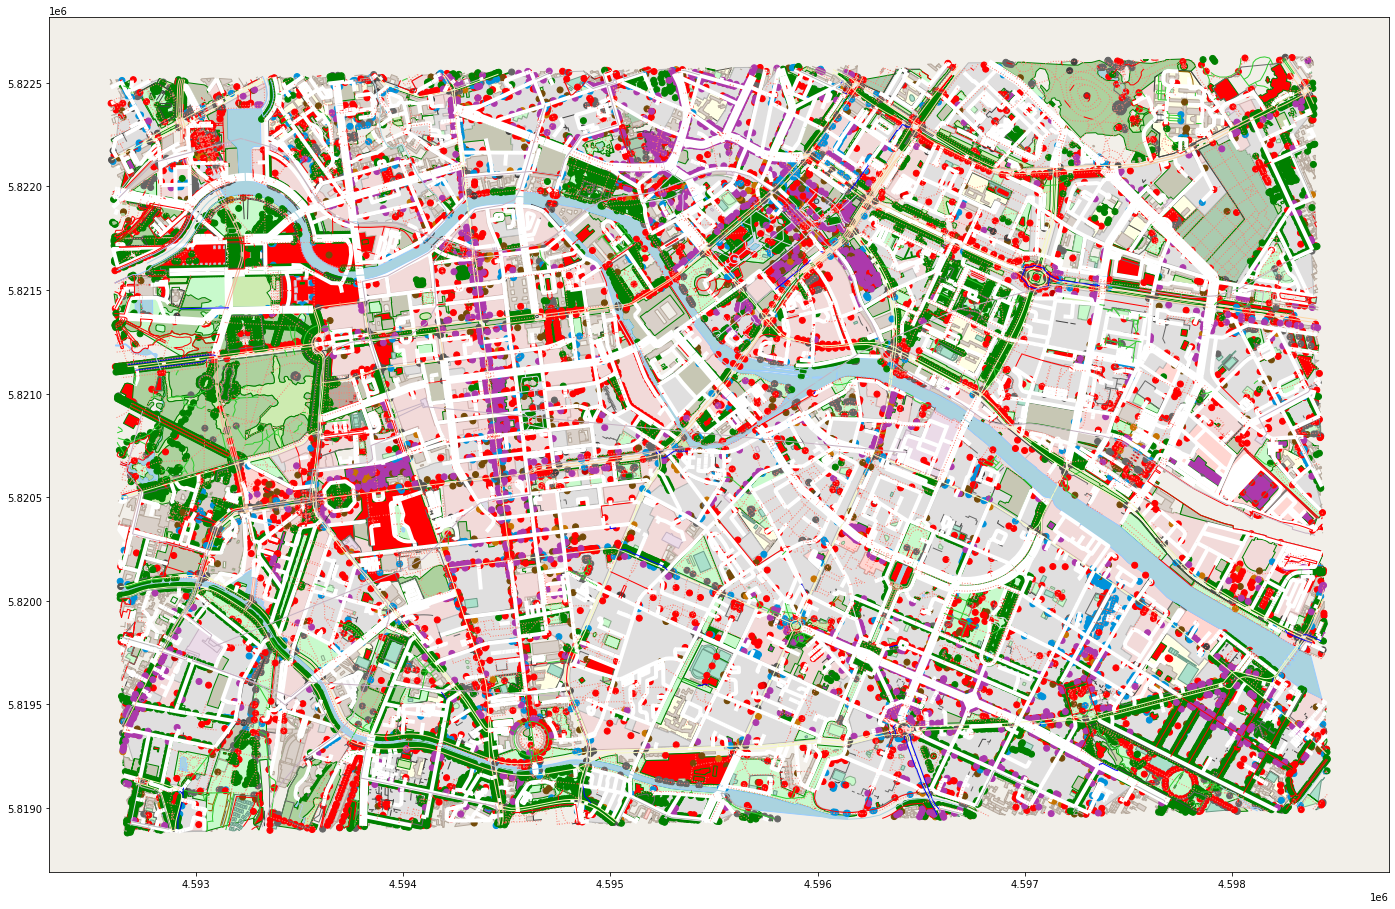

In [20]:
carto_plot(Berlin)

## Empty geometries

- When processing the XMLs quite a few geometries cause errors in their creation.

- The errors are caught and the elements written into the GeoDataFrame as empty geometries.

- Getting a larger XML of the same area and then filtering it to show the empty geometries in the smaller XML shows that the empty geometries are positioned around the edge of the query area.

### Difference in behaviour between Overpass API and XMLs (assumption)

- The Overpass API returns all of the data for geometries that overlap the edge of a query area

- XMLs are clipped to the edge of the query area and so only include partial geometries where they overlap the query area

### Sacramento

/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


(<Figure size 1728x1728 with 1 Axes>, <AxesSubplot:>)

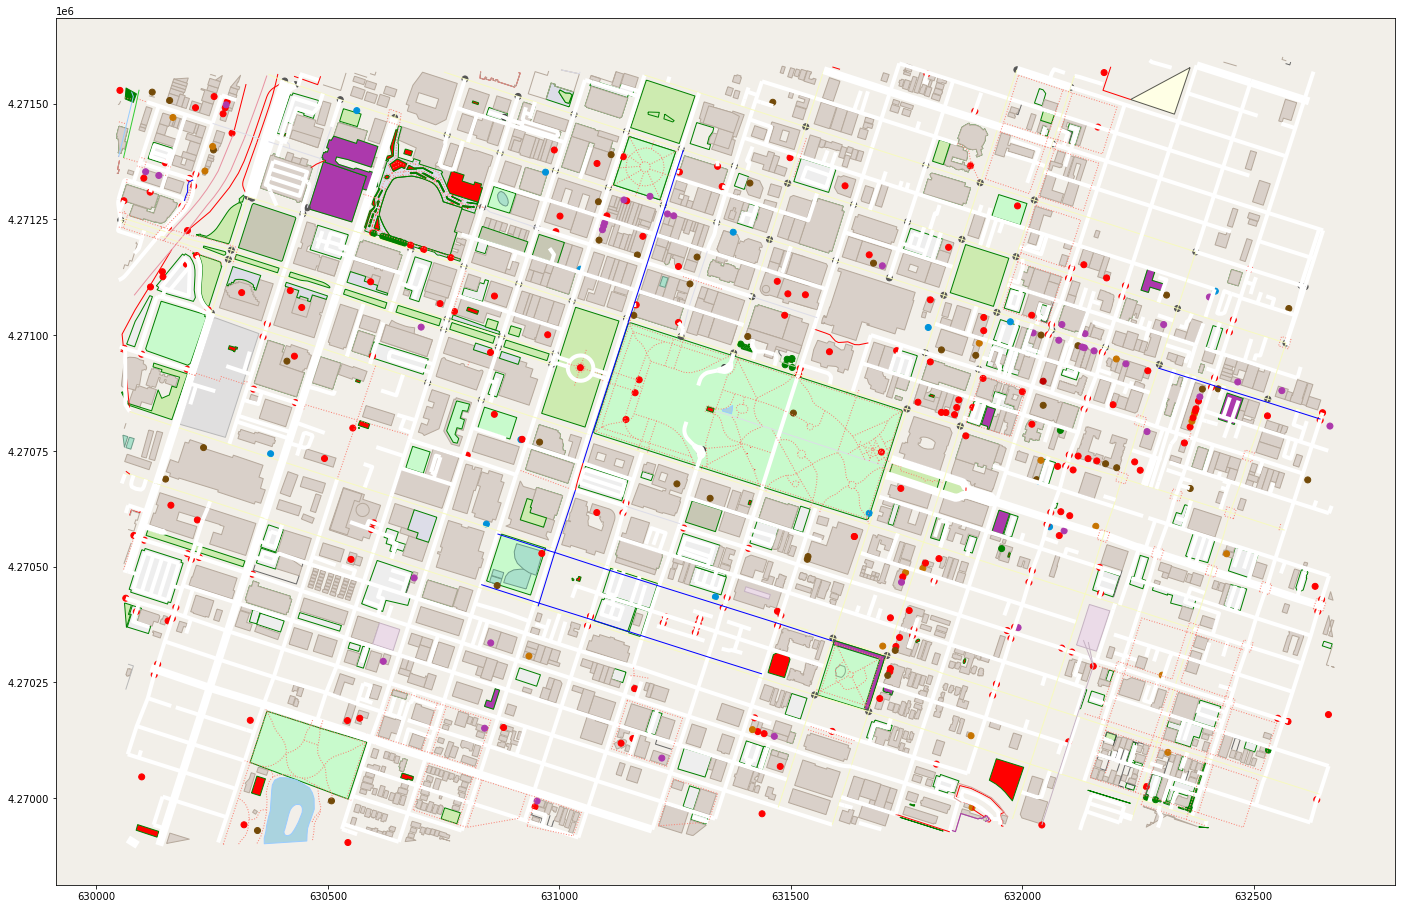

In [21]:
Sacramento = ox.gdf_from_xml('XML/planet_-121.507,38.568_-121.477,38.583.osm')
Sacramento = ox.project_gdf(Sacramento)
carto_plot(Sacramento)

### Sacramento bigger

/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarn

(<Figure size 1728x1728 with 1 Axes>, <AxesSubplot:>)

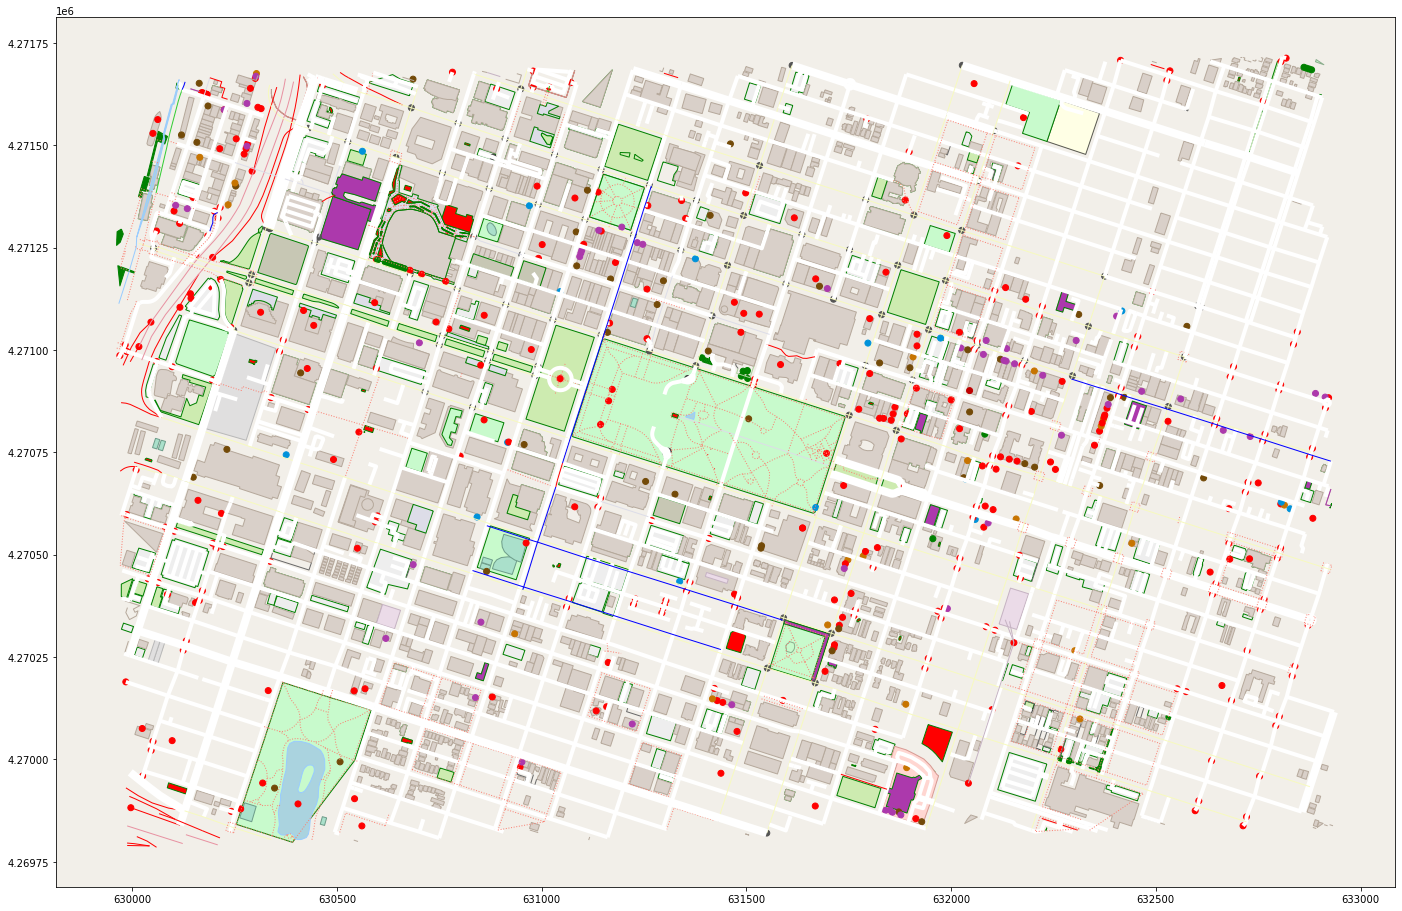

In [22]:
Sacramento_bigger = ox.gdf_from_xml('XML/planet_-121.508,38.567_-121.474,38.584.osm')
Sacramento_bigger = ox.project_gdf(Sacramento_bigger)
carto_plot(Sacramento_bigger)

### Find geometries in Sacramento_bigger that are empty in the smaller Sacramento

In [23]:
Sacramento_empty_geometry = Sacramento[Sacramento['geometry'].is_empty]

<AxesSubplot:>

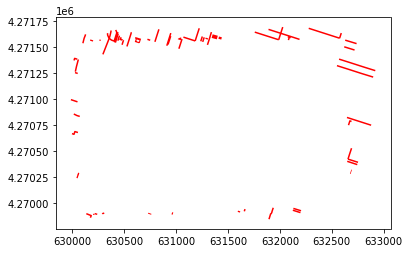

In [24]:
Sacramento_bigger[Sacramento_bigger['unique_id'].isin(Sacramento_empty_geometry['unique_id'])].plot(color='red')